## Brainstorming of Macroeconomics

Macroeconomics
1. Growth - 경기가 좋은가? GDP
2. Inflation - 돈의 가치가 떨어지는가? CPI, PCE(개인소비지출)
3. Policy & Liquidity - 연준이 무엇을 하는가? Fed Funds Rate, 10,2Y

5 Must-Have Indicators
1. GDP Growth Rate: 전분기 대비 얼마나 성장하였나? (분기별) GDP
2. CPI: 소비자 물가 지수, 시장이 가장 민감하게 반응 (월별) CPIAUCSL
3. Unemployment Rate: 실업률, 낮을 수록 경기가 튼튼함 (월별) UNRATE
4. Non-Farm Payrolls: 비공업 고용 지수, 매월 첫째 주 금요일 발표, 증시 영향력 1순위 (월별) PAYEMS
5. 10Y Treasury Yield: 10년물 국채 금리, 전 세계 자산 가격 기준선 (일별) DGS10
6. 2Y Treasury Yield: 2년물 국채 금리, 연준 정책 (기준금리)를 가장 잘 반영 (일별) DGS2


- 호황기 (Goldilocks): 성장 상승 $\uparrow$, 물가 적정 $\rightarrow$ 주가 상승 
- 과열기 (Overheating): 성장 과도 $\uparrow$, 물가 급등 $\uparrow$ $\rightarrow$ 연준이 긴장함
- 긴축기 (Tightening): 연준이 금리 인상 $\uparrow$ $\rightarrow$ 유동성 축소 $\rightarrow$ 주가 하락/조정 (2022년 상황)
- 침체기 (Recession): 고금리 여파로 성장 둔화 $\downarrow$, 실업률 상승 $\uparrow$, 물가 하락 $\downarrow$ $\rightarrow$ 주가 바닥 다지기
- 회복기 (Recovery): 연준이 금리 인하 $\downarrow$ $\rightarrow$ 경기 부양 $\rightarrow$ 주가 다시 상승 (2020년 코로나 이후, 혹은 현재 기대감)

# ETL and Plotting the basic macroeconomic factors that will be further analyzed
check the currrent trend for each macroeconomic factors

## DATA COLLECTING

In [8]:
%pip install pandas yfinance pandas_datareader matplotlib seaborn

     |████████████████████████████████| 10.8 MB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 39.9 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 34.5 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 44.1 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 20.7 MB/s eta 0:00:01
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
     |████████████████████████████████| 348 kB 37.4 MB/s eta 0:00:01
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
     |████████████████████████████████| 3.0 MB 48.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 36.9 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 107 kB 41.9 MB/s eta 0:00:01
     |████████████████████████████████| 173 kB 19.2 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 16.7 MB/s eta

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import datetime

# 1. 날짜 설정 (2000년부터 현재까지)
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime.now()

print("1. FRED(미 연준)에서 거시경제 데이터를 가져오는 중...")
# FRED 데이터 코드 정의 (Dictionary 형태)
# Key: 내가 사용할 변수명, Value: FRED의 고유 코드
indicators = {
    'GDP': 'GDP',               # GDP (분기)
    'CPI': 'CPIAUCSL',          # 소비자물가지수 (월간)
    'Unemployment': 'UNRATE',   # 실업률 (월간)
    'Fed_Rate': 'FEDFUNDS',     # 기준금리 (월간)
    'US_10Y': 'DGS10',          # 10년물 국채금리 (일간)
    'US_2Y': 'DGS2'             # 2년물 국채금리 (일간)
}

# pandas_datareader를 통해 FRED 데이터 다운로드
macro_df = web.DataReader(list(indicators.values()), 'fred', start_date, end_date)

# 컬럼 이름을 우리가 알아보기 쉬운 이름으로 변경
macro_df.columns = list(indicators.keys())
# ... (위쪽의 import 부분과 indicators 설정은 그대로 두세요) ...

print("2. Yahoo Finance에서 주식 데이터를 가져오는 중...")
# S&P 500 지수 다운로드
stock_raw = yf.download('^GSPC', start=start_date, end=end_date)

# [수정된 부분] yfinance 최신 버전 호환성 해결
# 데이터를 가져온 뒤 'Close' 컬럼만 확실하게 끄집어내서 이름을 강제로 바꿉니다.
if 'Close' in stock_raw.columns:
    stock_df = stock_raw['Close']
else:
    # 혹시 컬럼 구조가 다를 경우를 대비해 첫 번째 컬럼을 가져옴
    stock_df = stock_raw.iloc[:, 0]

# 데이터 타입이 DataFrame일 경우와 Series일 경우 모두를 대비해 확실하게 이름 변경
if isinstance(stock_df, pd.DataFrame):
    stock_df.columns = ['SP500'] # 데이터프레임이면 컬럼명 변경
    stock_df = stock_df['SP500'] # 시리즈로 변환
else:
    stock_df.name = 'SP500'      # 시리즈면 이름 부여



1. FRED(미 연준)에서 거시경제 데이터를 가져오는 중...
2. Yahoo Finance에서 주식 데이터를 가져오는 중...


[*********************100%***********************]  1 of 1 completed


In [7]:
print(macro_df, stock_df)


                  GDP    CPI  Unemployment  Fed_Rate  US_10Y  US_2Y
DATE                                                               
2000-01-01  10002.179  169.3           4.0      5.45     NaN    NaN
2000-01-03        NaN    NaN           NaN       NaN    6.58   6.38
2000-01-04        NaN    NaN           NaN       NaN    6.49   6.30
2000-01-05        NaN    NaN           NaN       NaN    6.62   6.38
2000-01-06        NaN    NaN           NaN       NaN    6.57   6.35
...               ...    ...           ...       ...     ...    ...
2025-12-25        NaN    NaN           NaN       NaN     NaN    NaN
2025-12-26        NaN    NaN           NaN       NaN    4.14   3.46
2025-12-29        NaN    NaN           NaN       NaN    4.12   3.45
2025-12-30        NaN    NaN           NaN       NaN    4.14   3.45
2025-12-31        NaN    NaN           NaN       NaN    4.18   3.47

[6873 rows x 6 columns] Date
2000-01-03    1455.219971
2000-01-04    1399.420044
2000-01-05    1402.109985
2000-01-

In [10]:
# 3. 데이터 병합 (이제 'SP500'이라는 이름이 확실히 존재합니다)
df = pd.merge(macro_df, stock_df, left_index=True, right_index=True, how='outer')

# 빈 데이터 채우기
df = df.ffill() 
df = df.dropna()

print(df)



                  GDP      CPI  Unemployment  Fed_Rate  US_10Y  US_2Y  \
2000-01-03  10002.179  169.300           4.0      5.45    6.58   6.38   
2000-01-04  10002.179  169.300           4.0      5.45    6.49   6.30   
2000-01-05  10002.179  169.300           4.0      5.45    6.62   6.38   
2000-01-06  10002.179  169.300           4.0      5.45    6.57   6.35   
2000-01-07  10002.179  169.300           4.0      5.45    6.52   6.31   
...               ...      ...           ...       ...     ...    ...   
2025-12-26  31095.089  325.031           4.6      3.72    4.14   3.46   
2025-12-29  31095.089  325.031           4.6      3.72    4.12   3.45   
2025-12-30  31095.089  325.031           4.6      3.72    4.14   3.45   
2025-12-31  31095.089  325.031           4.6      3.72    4.18   3.47   
2026-01-02  31095.089  325.031           4.6      3.72    4.18   3.47   

                  SP500  
2000-01-03  1455.219971  
2000-01-04  1399.420044  
2000-01-05  1402.109985  
2000-01-06  1403.44

In [21]:
# 4. 파생 지표 만들기 (인사이트용)
# 장단기 금리차 (10년물 - 2년물): 경기 침체 예측 지표
df['Yield_Gap'] = df['US_10Y'] - df['US_2Y']

print("\n[데이터 준비 완료!]")
print(df.tail()) # 최근 5일치 데이터 확인



[데이터 준비 완료!]
                  GDP      CPI  Unemployment  Fed_Rate  US_10Y  US_2Y  \
2025-12-26  31095.089  325.031           4.6      3.72    4.14   3.46   
2025-12-29  31095.089  325.031           4.6      3.72    4.12   3.45   
2025-12-30  31095.089  325.031           4.6      3.72    4.14   3.45   
2025-12-31  31095.089  325.031           4.6      3.72    4.18   3.47   
2026-01-02  31095.089  325.031           4.6      3.72    4.18   3.47   

                  SP500  Yield_Gap  
2025-12-26  6929.939941       0.68  
2025-12-29  6905.740234       0.67  
2025-12-30  6896.240234       0.69  
2025-12-31  6845.500000       0.71  
2026-01-02  6858.470215       0.71  


In [13]:
df

,GDP,CPI,Unemployment,Fed_Rate,US_10Y,US_2Y,SP500,Yield_Gap
2000-01-03,10002.179,169.300,4.0,5.45,6.58,6.38,1455.219971,0.20
2000-01-04,10002.179,169.300,4.0,5.45,6.49,6.30,1399.420044,0.19
2000-01-05,10002.179,169.300,4.0,5.45,6.62,6.38,1402.109985,0.24
2000-01-06,10002.179,169.300,4.0,5.45,6.57,6.35,1403.449951,0.22
2000-01-07,10002.179,169.300,4.0,5.45,6.52,6.31,1441.469971,0.21
...,...,...,...,...,...,...,...,...
2025-12-26,31095.089,325.031,4.6,3.72,4.14,3.46,6929.939941,0.68
2025-12-29,31095.089,325.031,4.6,3.72,4.12,3.45,6905.740234,0.67
2025-12-30,31095.089,325.031,4.6,3.72,4.14,3.45,6896.240234,0.69
2025-12-31,31095.089,325.031,4.6,3.72,4.18,3.47,6845.500000,0.71


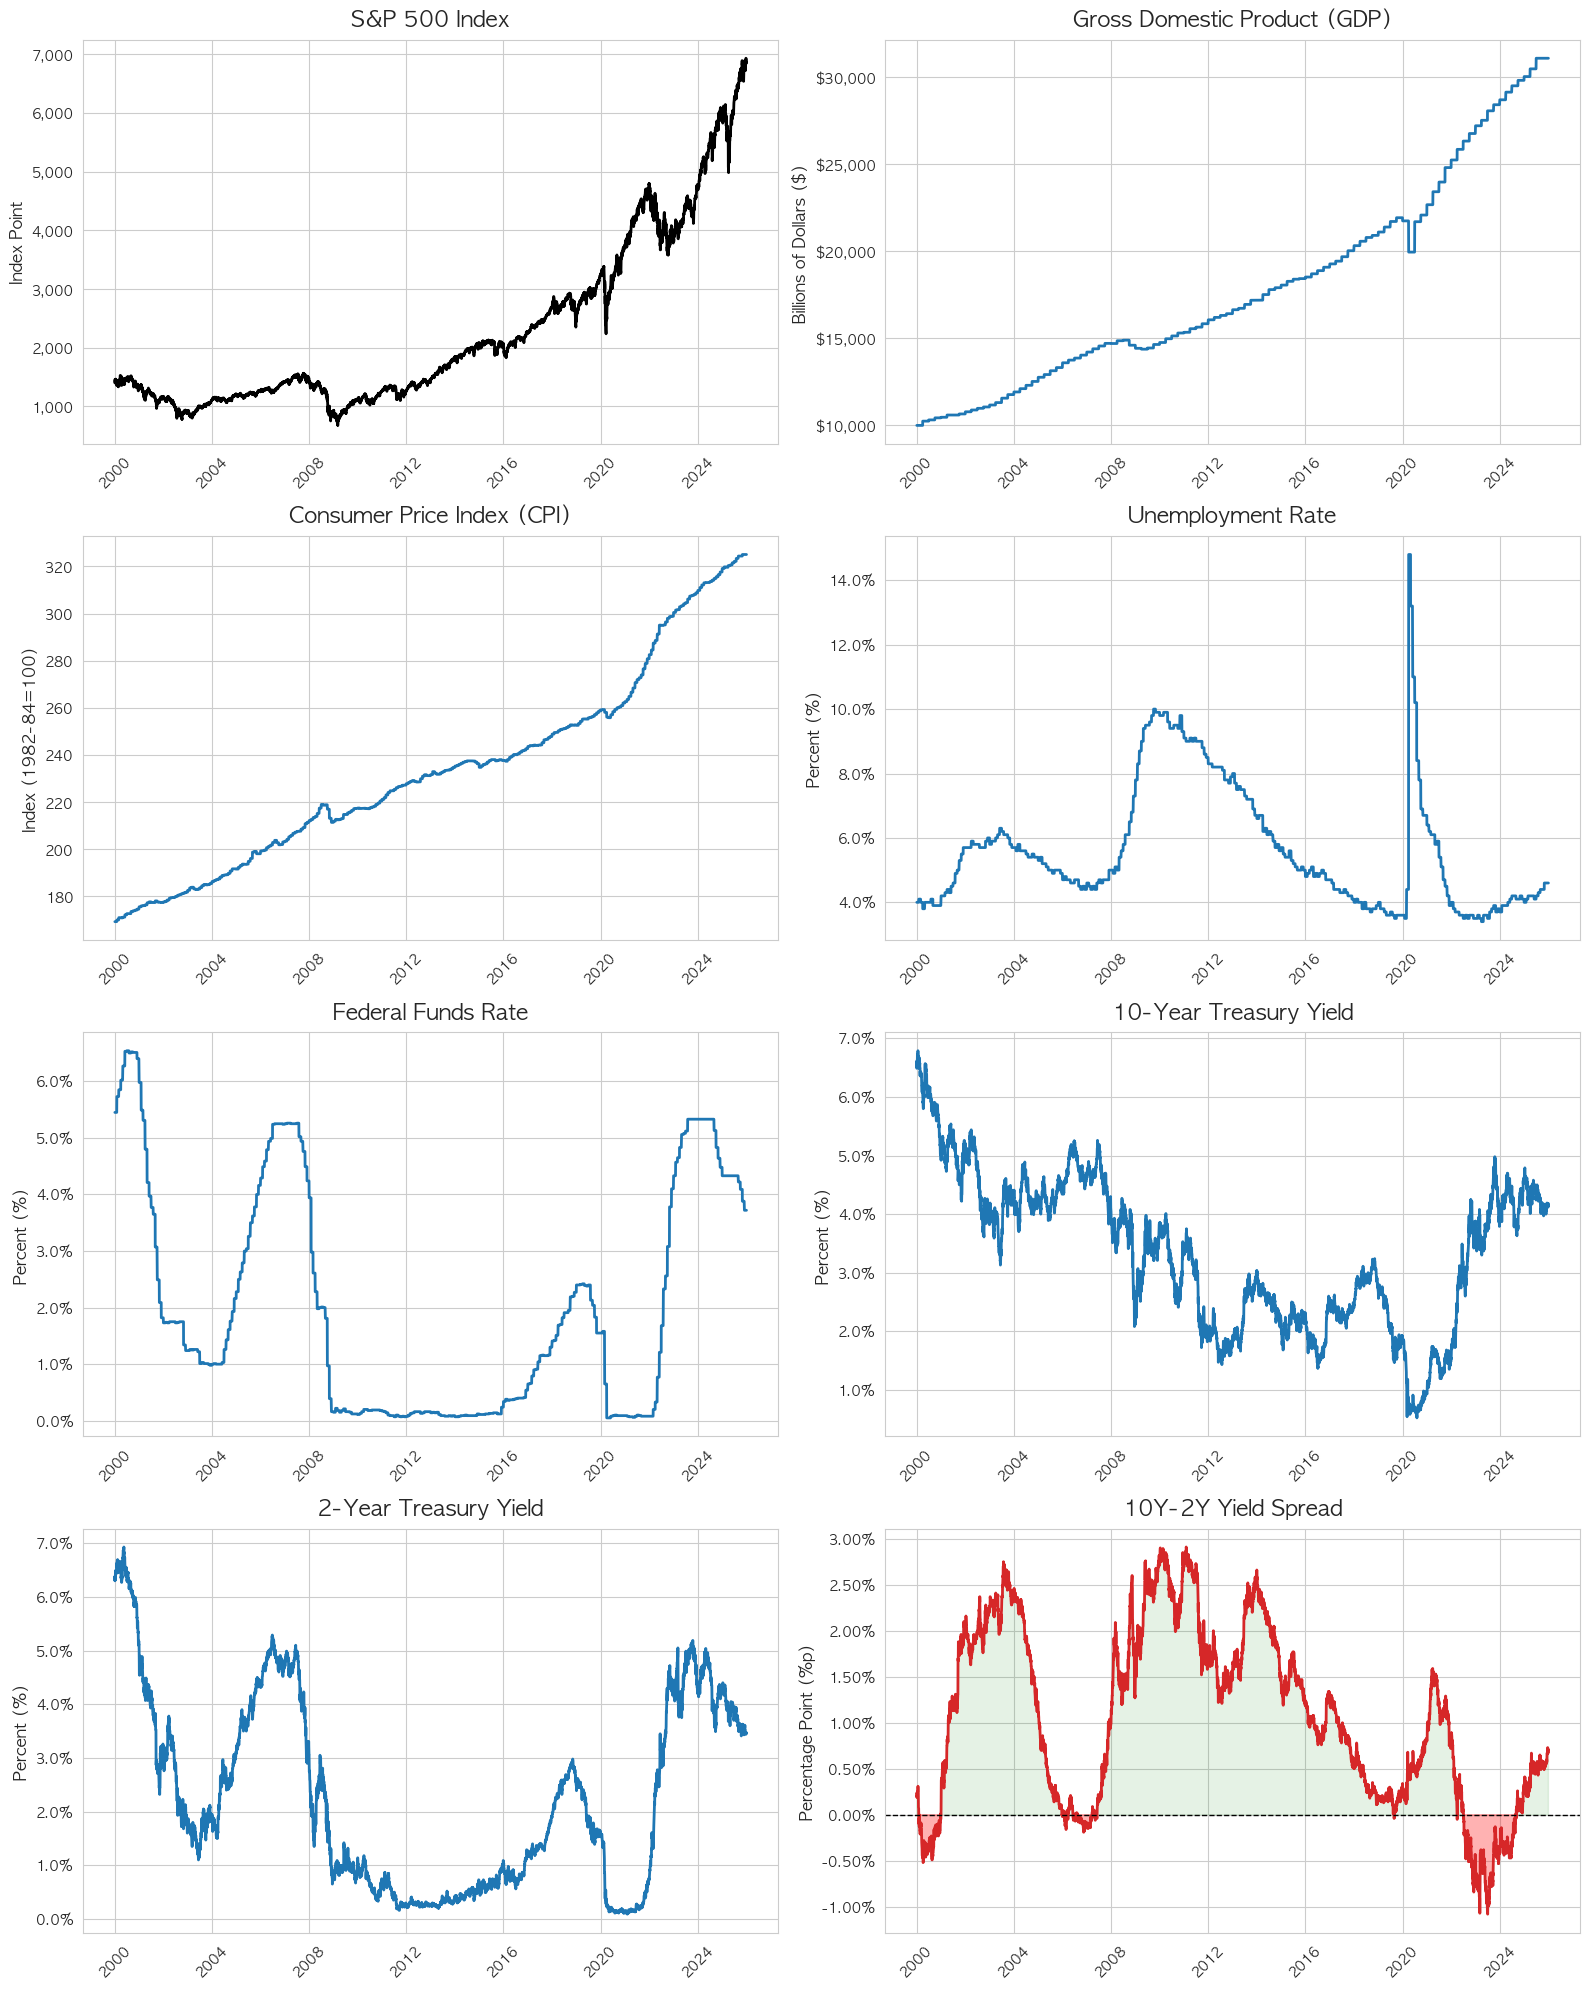

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # 축 서식 변경을 위한 모듈
import seaborn as sns

# 스타일 설정
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'AppleGothic' 
plt.rcParams['axes.unicode_minus'] = False

# 분석할 컬럼 목록
columns_to_plot = ['SP500', 'GDP', 'CPI', 'Unemployment', 
                   'Fed_Rate', 'US_10Y', 'US_2Y', 'Yield_Gap']

# 각 지표별 단위 및 서식 정의 (Dictionary)
# fmt: y축 눈금 표시 형식 ({x:,.0f}는 천 단위 콤마)
meta_info = {
    'SP500': {'title': 'S&P 500 Index', 'ylabel': 'Index Point', 'fmt': '{x:,.0f}'},
    'GDP': {'title': 'Gross Domestic Product (GDP)', 'ylabel': 'Billions of Dollars ($)', 'fmt': '${x:,.0f}'},
    'CPI': {'title': 'Consumer Price Index (CPI)', 'ylabel': 'Index (1982-84=100)', 'fmt': '{x:.0f}'},
    'Unemployment': {'title': 'Unemployment Rate', 'ylabel': 'Percent (%)', 'fmt': '{x:.1f}%'},
    'Fed_Rate': {'title': 'Federal Funds Rate', 'ylabel': 'Percent (%)', 'fmt': '{x:.1f}%'},
    'US_10Y': {'title': '10-Year Treasury Yield', 'ylabel': 'Percent (%)', 'fmt': '{x:.1f}%'},
    'US_2Y': {'title': '2-Year Treasury Yield', 'ylabel': 'Percent (%)', 'fmt': '{x:.1f}%'},
    'Yield_Gap': {'title': '10Y-2Y Yield Spread', 'ylabel': 'Percentage Point (%p)', 'fmt': '{x:.2f}%'}
}

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20)) # 크기를 조금 더 키웠습니다
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    # 1. 메타 정보 가져오기
    info = meta_info.get(col, {'title': col, 'ylabel': '', 'fmt': '{x}'})
    
    # 2. 색상 설정
    color = 'tab:blue'
    if col == 'SP500': color = 'black'
    elif col == 'Yield_Gap': color = 'tab:red'
    
    # 3. 그래프 그리기
    axes[i].plot(df.index, df[col], color=color, linewidth=2)
    
    # 4. 제목 및 축 라벨 설정 (단위 포함)
    axes[i].set_title(info['title'], fontsize=16, fontweight='bold', pad=10)
    axes[i].set_ylabel(info['ylabel'], fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    
    # 5. Y축 눈금 서식 적용 (%, $ 등 붙이기)
    axes[i].yaxis.set_major_formatter(mtick.StrMethodFormatter(info['fmt']))
    
    # [특수 처리] Yield_Gap: 0 기준선 및 채우기
    if col == 'Yield_Gap':
        axes[i].axhline(0, color='black', linestyle='--', linewidth=1)
        axes[i].fill_between(df.index, 0, df[col], where=(df[col] < 0), color='red', alpha=0.3)
        axes[i].fill_between(df.index, 0, df[col], where=(df[col] >= 0), color='green', alpha=0.1)

plt.tight_layout()
plt.show()